In [18]:
# Importing the needed packages

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/gratitude-data-2021/gratitude_data_1.csv


In [19]:
# Adding the data to a pandas dataframe

gratitude_df = pd.read_csv('/kaggle/input/gratitude-data-2021/gratitude_data_1.csv')

# Printing the first 5 rows to make sure the data is correctly loaded

print(gratitude_df.head())

   note_id gratitude_type  time_of_event
0        1        weekend           2021
1        2       sleeping           2021
2        3         parent           2021
3        4        weather           2021
4        5       sleeping           2021


In [29]:
# Count of gratitude category
gratitude_count = gratitude_df['gratitude_type'].value_counts()
print(gratitude_count)

total_gratitude = gratitude_count.sum()
print("Total Gratitude Entries =",total_gratitude)

family             168
parent             135
friends             95
sports              89
sleeping            84
weekend             77
new day             70
myself              67
fun                 64
sibling             57
work from home      55
specific friend     41
career              41
faith               38
exercise            33
health              31
education           30
achievement         28
travel              27
specific family     27
mental health       26
home                23
weather             20
entertainment       20
material            19
safety              13
food                10
love                 9
other                5
Name: gratitude_type, dtype: int64
Total Gratitude Entries = 1402


In [30]:
# Finding the top 10 in order to plot them on a bar graph

top_ten = gratitude_count.nlargest(10)
print(top_ten)

family      168
parent      135
friends      95
sports       89
sleeping     84
weekend      77
new day      70
myself       67
fun          64
sibling      57
Name: gratitude_type, dtype: int64


Text(0, 0.5, 'Total Entries')

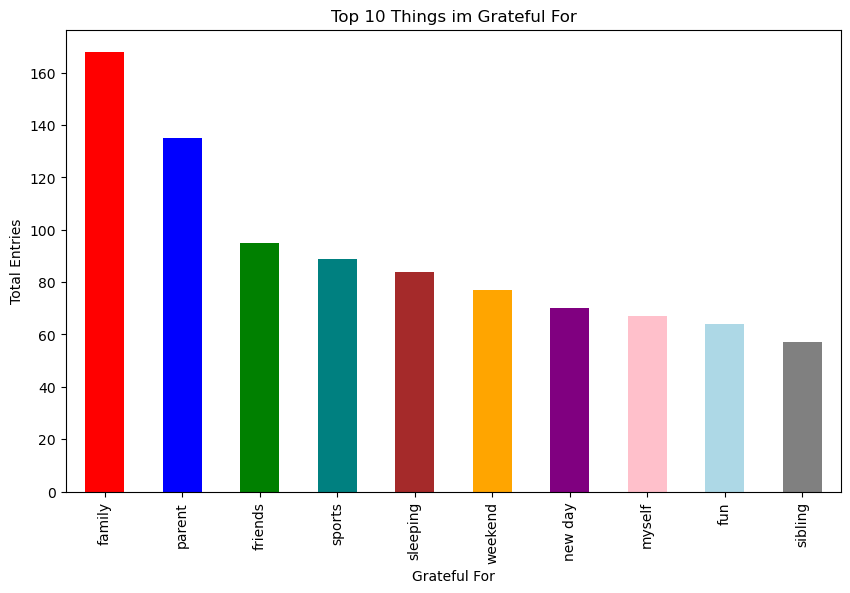

In [40]:
# Bar graph with the top 10 things I'm most grateful for

plt.figure(figsize=(10,6))
top_ten.plot(
  kind='bar',
  color=['red','blue','green','teal','brown','orange','purple','pink','lightblue','grey'])
plt.title('Top 10 Things im Grateful For')
plt.xlabel('Grateful For')
plt.ylabel('Total Entries')

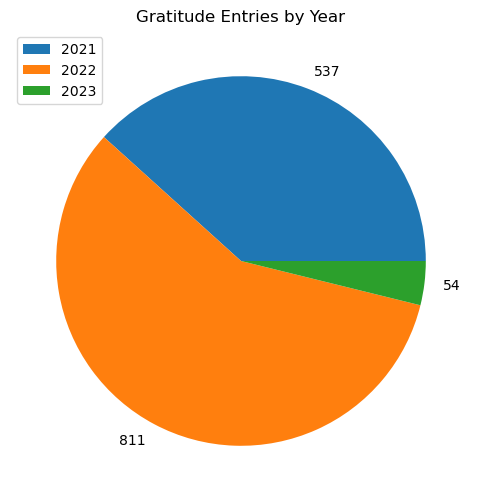

In [100]:
# Grouping the gratitude entries by year and plotting them on a Pie Graph

count_per_year = gratitude_df.groupby('time_of_event')['gratitude_type'].count()

years = ['2021','2022','2023']

plt.figure(figsize=(10,6))
plt.pie(count_per_year, labels=count_per_year)
plt.title('Gratitude Entries by Year')
plt.legend(count_per_year.index, loc='best')

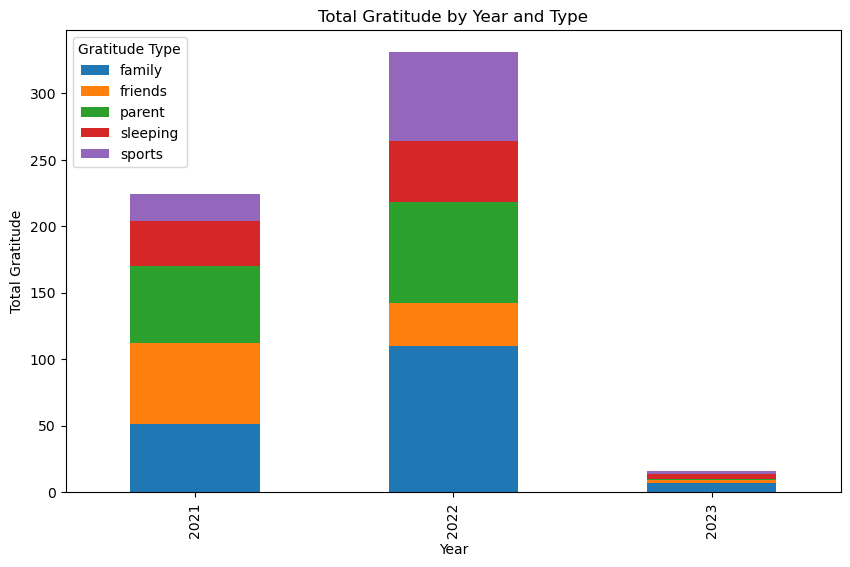

In [102]:
# Stacked Bar graph showing the change of entries by year

# First grouping the data by year and count of gratitude type
grouped = gratitude_df.groupby(['time_of_event', 'gratitude_type']).size().reset_index(name='count')

# Get the top 5 gratitude types
top_gratitude_types = grouped.groupby('gratitude_type')['count'].sum().nlargest(5).index

# Filtering the data to only include the top 5 gratitude types
filtered = grouped[grouped['gratitude_type'].isin(top_gratitude_types)]

# Pivot the data to have one column per gratitude type
pivoted = filtered.pivot(index='time_of_event', columns='gratitude_type', values='count').fillna(0)

# Creation of Bar Chart
pivoted.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Total Gratitude')
plt.title('Total Gratitude by Year and Type')
plt.legend(title='Gratitude Type', loc='upper left')
plt.show()